**Problem Statement**: Implementing a Dataset-Bank Personal Loan Modeling for predictive learning, analyzing the data's accuracy, and identifying the key features.


# **Abstarct:**

This dataset has data about 5000 customers  and the information includes the customer's age, income, and other demographics; the customer's relationship with the bank; and the customer's response to the most recent personal loan campaign (Personal Loan). Only 480 (or 9.6%) of these 5000 clients accepted the personal loan that was presented to them during the previous campaign.


Here's information regarding the attributes of the dataset:
Attribute Information:

ID : Customer ID

Age : Customer's age in completed years

Experience : #years of professional experience

Income : Annual income of the customer ($000)

ZIP Code : Home Address ZIP code.

Family : Family size of the customer

CCAvg : Avg. spending on credit cards per month ($000)

Education : Education Level.
1: Undergrad;
2: Graduate;
3: Advanced/Professional

Mortgage : Value of house mortgage if any. ($000)

10.Personal Loan : Did this customer accept the personal loan offered in the last campaign?

11.Securities Account : Does the customer have a securities account with the bank?

12.CD Account : Does the customer have a certificate of deposit (CD) account with the bank?

13.Online : Does the customer use internet banking facilities?

14.Credit card : Does the customer use a credit card issued by ID


# **Data**

In [5]:
!pip install eli5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import  train_test_split
import eli5
from eli5.sklearn import PermutationImportance

import warnings 
warnings.filterwarnings("ignore")

data = pd.read_csv("https://raw.githubusercontent.com/RiddhiVora23/Data_Science/main/Bank_Personal_Loan_Modelling.csv?token=GHSAT0AAAAAAB5YRXXNVNU3NVAITZCCF3I6Y67FDTQ")

data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


# **Here are the data types**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In this Data set there are 2 datatypes 13-int64 1-float64

Numeric datatypes:

ID

Age

Experience

Income

ZIP code

Family

CCAvg

Mortgage

Categorical datatypes:

Education

Personal Loan

Securities Account

CD account

Online

CreditCard

In [8]:
data.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Except for the experience, all of the variable ranges in this dataset make sense.

According to the sample, experience must be at least -3, which is illogically impossible.

In [9]:
data['Experience'][data.Experience<0].count()

52

Here in the third column "Experience" has a negative value, which is not possible.


# **Missing Values**

In [10]:
#data.isnull()
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Here as we can see, there are no missing values in the dataset.

# **Likely distributions of the numeric variables:**

Density curves
Plotting density curves for numeric variables. A density plot is a smoothed, continuous version of a histogram estimated from the data.

x-axis: Variable

y-axis: Density (frequency with respect to number of instances)

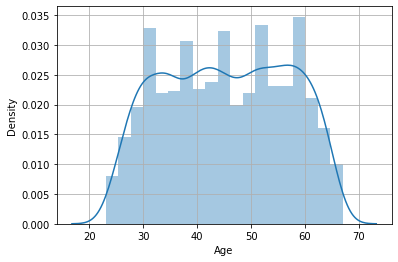

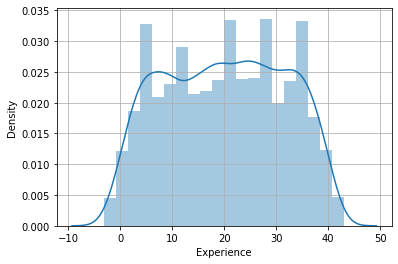

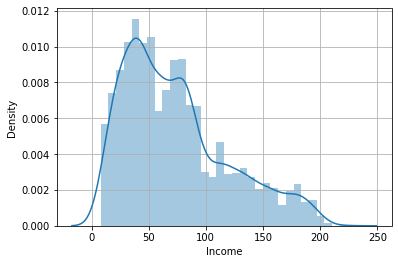

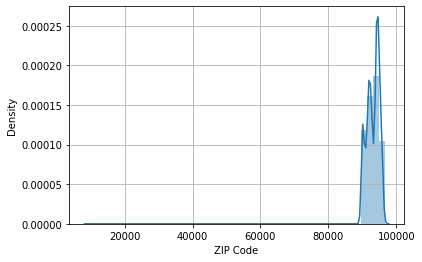

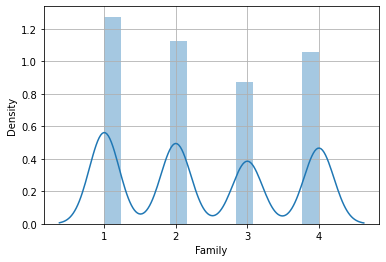

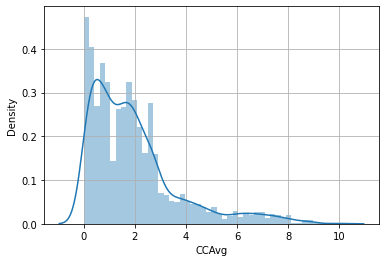

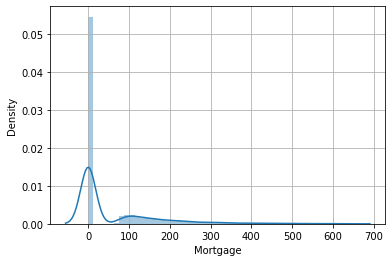

In [11]:
List =['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Mortgage']


def distribution(data,list):
  sns.distplot(data[list])
  plt.show()
for i in List:
  plt.grid(True)
  distribution(data,i)
  plt.show()

We can determine the percentage of samples in various values using this density curves.

Assumptions:

Age: multimodal distribution

Experience: Multimodal distribution

Income: Right skewed- bimodal distribution

ZIP code: Left skewed- multimodal distribution

Family: Multimodal distribution

CCAvg: Right skewed-bimodal distribution

Mortgage: Right skewed distribution

# Independent variables which are useful to predict a target.
OLS Regression method

In [12]:
var = sm.OLS(data['Personal Loan'], data[['Age','Experience','Income','ZIP Code','Family','CCAvg','Education',
                                      'Mortgage','Securities Account','CD Account','Online','CreditCard']]).fit()

var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Personal Loan   R-squared (uncentered):                   0.445
Model:                            OLS   Adj. R-squared (uncentered):              0.443
Method:                 Least Squares   F-statistic:                              332.9
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                        0.00
Time:                        03:56:13   Log-Likelihood:                          234.63
No. Observations:                5000   AIC:                                     -445.3
Df Residuals:                    4988   BIC:                                     -367.1
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0081      0.002     -3.236      0.001      -0.013      -0.003
Experience             0.0085      0.003      3.400      0.001       0.004       0.013
Income                 0.0030   9.66e-05     30.941      0.000       0.003       0.003
ZIP Code           -1.831e-06    6.7e-07     -2.732      0.006   -3.15e-06   -5.17e-07
Family                 0.0332      0.003     11.452      0.000       0.027       0.039
CCAvg                  0.0121      0.002      4.909      0.000       0.007       0.017
Education              0.0799      0.004     19.461      0.000       0.072       0.088
Mortgage            6.485e-05    3.3e-05      1.968      0.049    2.38e-07       0.000
Securities Account    -0.0605      0.011     -5.311      0.000      -0.083      -0.038
CD Account             0.3301      0.016     20.860      0.000       0.299       0.361
Online                -0.0266      0.007     -3.921      0.000      -0.040      -0.013
CreditCard            -0.0455      0.008     -6.021      0.000      -0.060      -0.031
==============================================================================
Omnibus:                     1307.116   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3403.350
Skew:                           1.407   Prob(JB):                         0.00
Kurtosis:                       5.901   Cond. No.                     4.81e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this dataset the target value is "Personal Loan".

To analyze the significance of the independent variable on the target variable, we will use the p-value from the summary.

Significant variables (p-value < 0.05):

Age

Experience

Income

ZIP Code

Family

CCAvg

Education

Securities Account

CD Account

Online

CreditCard

Non-significant Independent variable: (p-value < 0.04)

There are no non-significant factors, although mortgage has a p-value of 0.049, which is very near to 0.05, making it the least significant.

#Using Correlation matrix to find dependency.

In [13]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


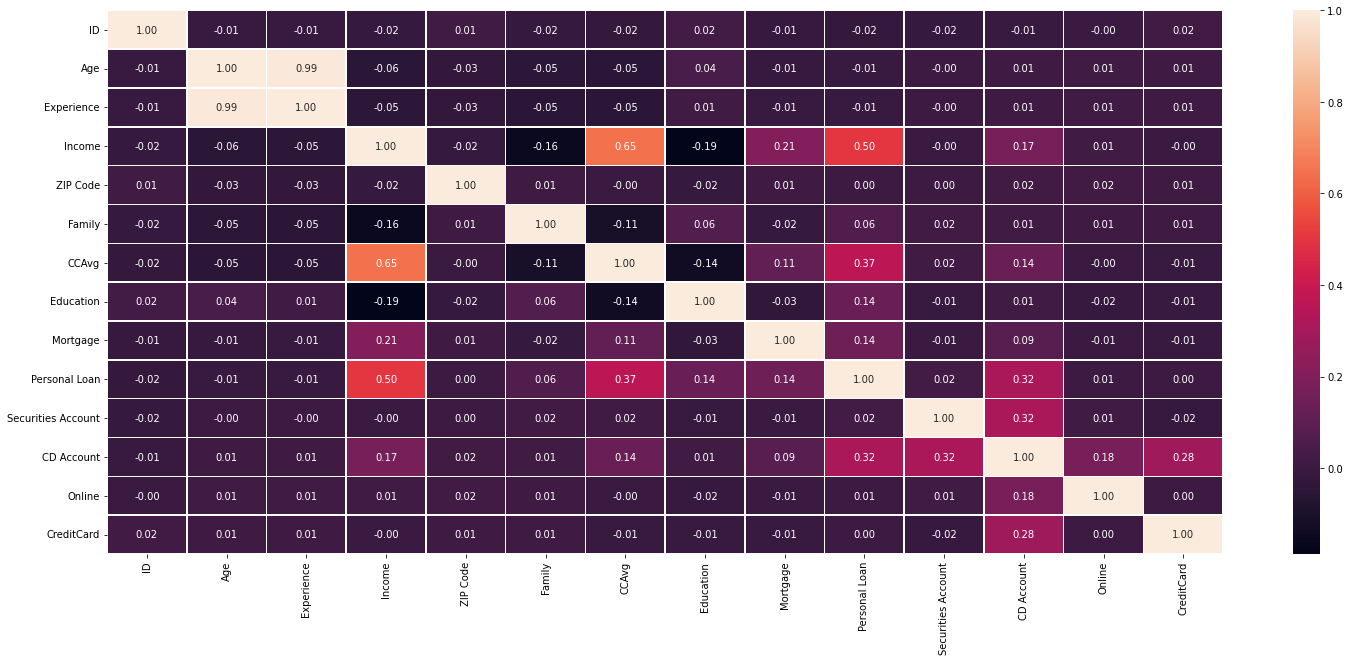

In [14]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.2f')
plt.show()

Since, our target value is Personal loan.

Therefore, the following is how independent variables affect the prediction of the target variable: from least to most

Income (0.50)

CCAvg (0.37)

CD Account (0.32)

Education & Mortgage (0.14)

Family (0.06)

Securities Account (0.02)

Online (0.01)

ZIP Code & CreditCard (0.00)

Age & Experience (-0.01)

In this Dataset, the predictor variables are not independent of each other.


Experience and Age(0.99), Income and CCAvg(0.65) are dependent on each other.

# Splitting Data into train and test

In [15]:
X = data[['ID','Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage',
        'Securities Account','CD Account','Online','CreditCard']]

y = data['Personal Loan']

#spliting data 
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

X_train,X_t, y_train,y_t= train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [16]:
X

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

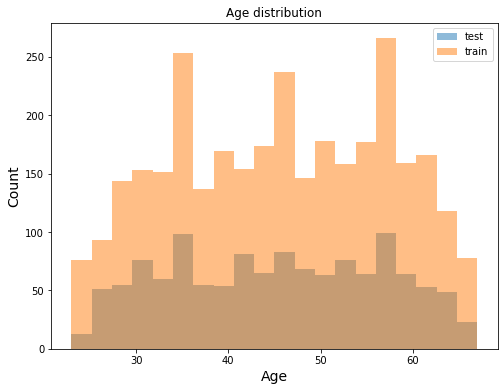

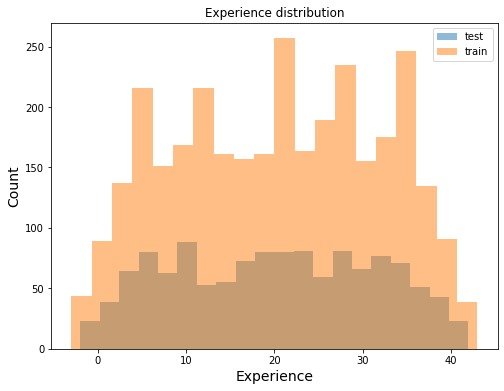

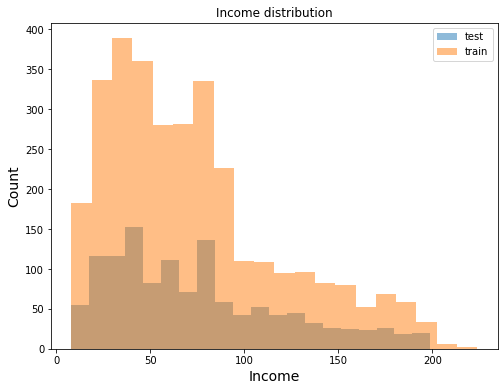

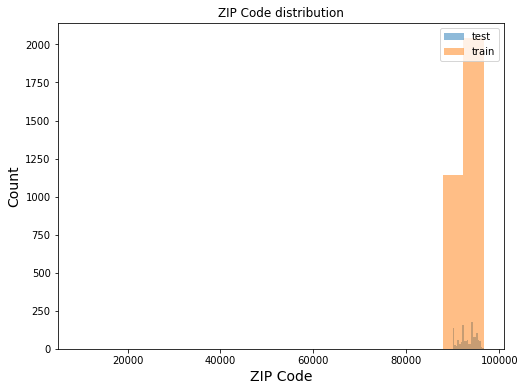

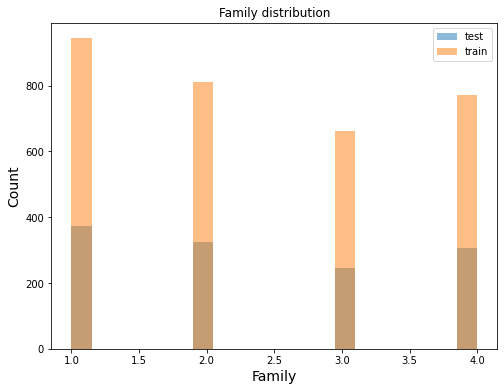

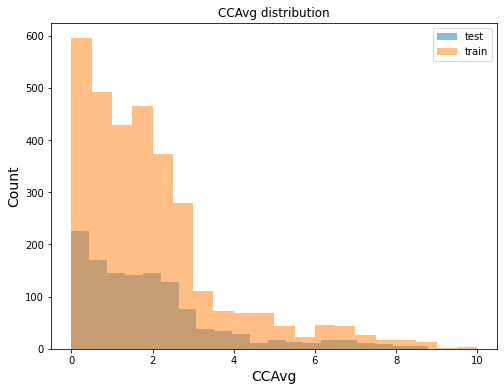

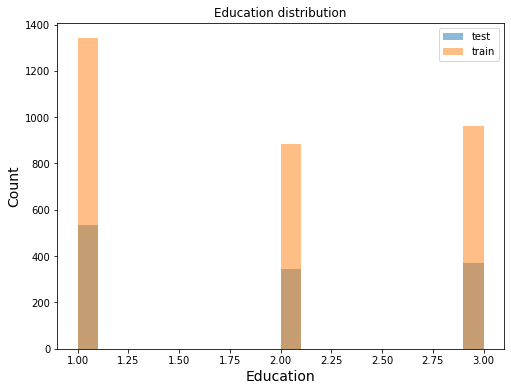

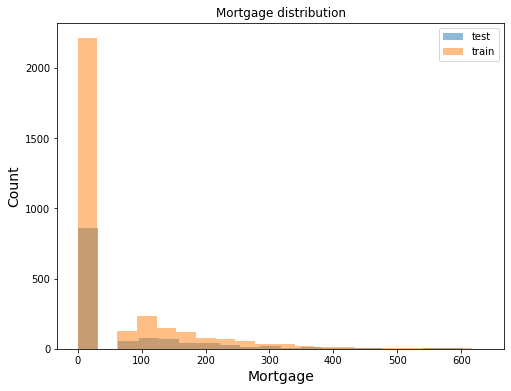

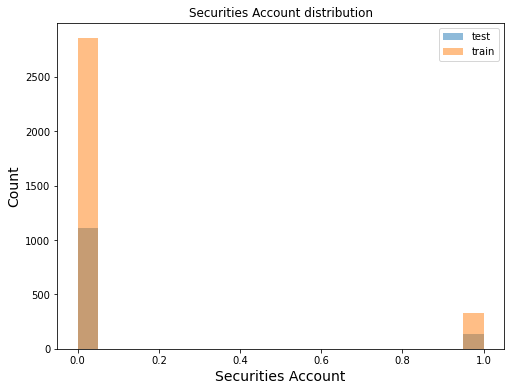

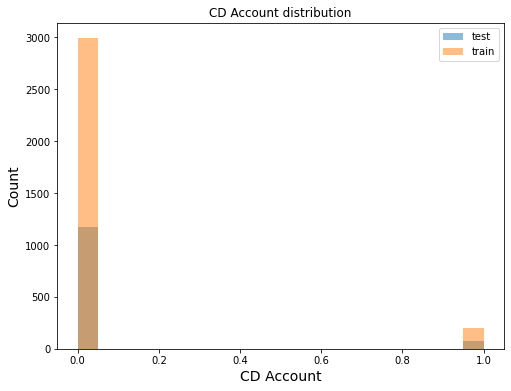

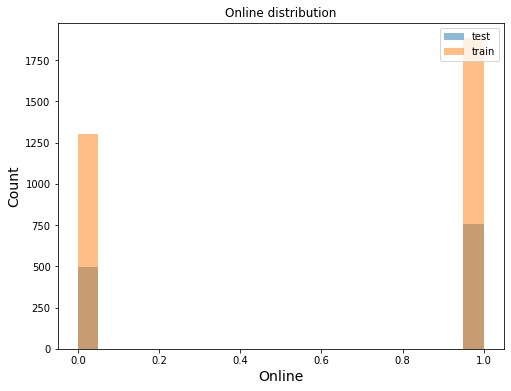

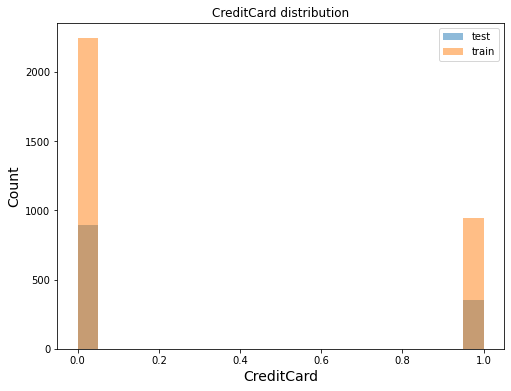

In [18]:
X_test_plot = X_test[['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage',
        'Securities Account','CD Account','Online','CreditCard']]

X_train_plot = X_train[['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage',
        'Securities Account','CD Account','Online','CreditCard']]

#X_train,X_t, y_train,y_t= train_test_split(X_t, y_t, test_size=0.15, random_state=1)

# Plotting the data to see the histogram of train and text data 
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

We can see that the train and test data have a similar distribution by looking at the graphs. This indicates that they share the same data.

# Logistic regression and model accuracy

In [19]:
#from sklearn.metrics import r2_score, mean_squared_error 
#from sklearn.linear_model import LinearRegression
#from sklearn import datasets, linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.metrics import zero_one_loss
#from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.metrics import log_loss


# Create logistic regression object
regr = LogisticRegression()

model_lor = regr.fit(X_train, y_train)
prediction = model_lor.predict(X_test)

# Train the model using the training sets
regr.fit(X_train,y_train)

#accuracy
print("training data score: {:,.3%}".format(regr.score(X_train, y_train)))
print("test data score: {:,.3%}".format(regr.score(X_test, y_test)))

#Make predictions using the training set
y_pred = regr.predict(X_train)

logloss = log_loss(y_test,regr.predict_log_proba(X_test))
print("Log loss:",logloss)


training data score: 93.191%
test data score: 92.720%
Log loss: 0.6931471805599454


The Accuracy of model before removing outliers from CCAvg is obsereved to be 90.2% in training data and 89.6% in test data.

# Using XGBoost Method

In [20]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)


importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})


importances = importances.sort_values(by='Importance', ascending=False)

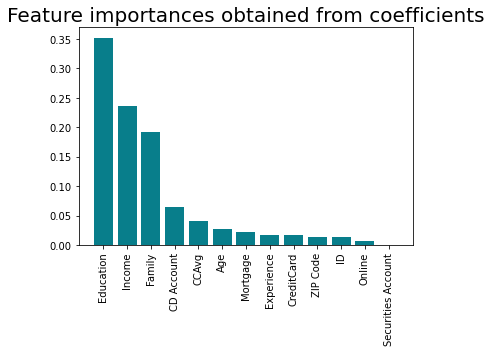

In [21]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction))

[[1099   22]
 [  69   60]]


# Random Forest Classifier

In [23]:
from numpy.random.mtrand import random_integers
from sklearn.ensemble import RandomForestClassifier

regr1 = RandomForestClassifier()
model1 = regr1.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("training data score: {:,.3%}".format(regr1.score(X_train, y_train)))
print("test data score: {:,.3%}".format(regr1.score(X_test, y_test)))

training data score: 100.000%
test data score: 97.920%


The overfitting of the Random Forest Classifier model results in 100% accuracy on the training dataset.

In [24]:
perm = PermutationImportance(model1, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1680 ± 0.0088,Income
0.0888 ± 0.0124,Education
0.0587 ± 0.0064,Family
0.0072 ± 0.0032,CCAvg
0.0018 ± 0.0006,CD Account
0.0008 ± 0.0010,Experience
0.0005 ± 0.0008,Age
0.0003 ± 0.0008,ZIP Code
0.0002 ± 0.0016,ID
0 ± 0.0000,CreditCard


Permutation feature importance measures the increase in the prediction error of the model after we permuted the feature’s values, which breaks the relationship between the feature and the true outcome.

A feature is “important” if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction. A feature is “unimportant” if shuffling its values leaves the model error unchanged, because in this case the model ignored the feature for the prediction.

Therefore, In this data set Income is the most important feature.

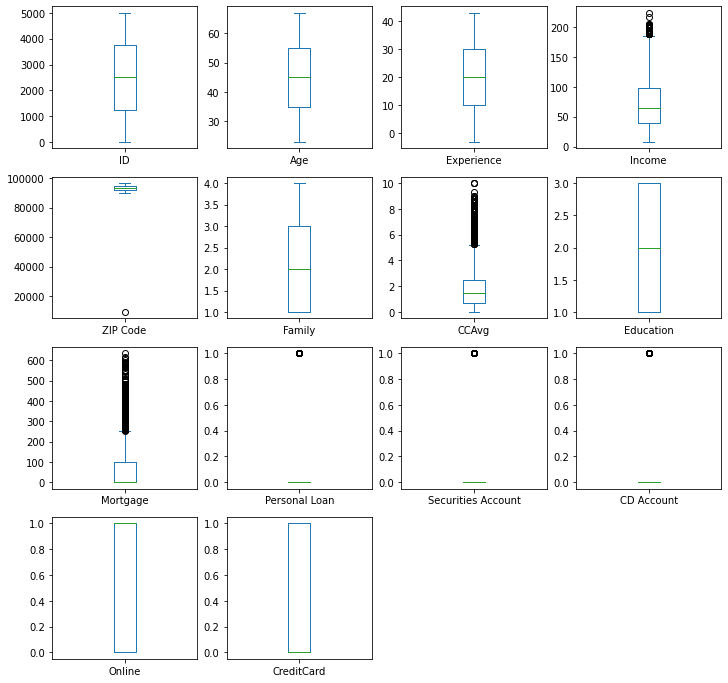

In [25]:
data.plot(kind='box', figsize=(12,12), layout=(4,4),sharex=False, subplots=True);

# Removing Outliers from CCAvg
To remove outliers, first identify the location of outliers and then remove them from the list.

In [26]:
data_outliers = data.copy()

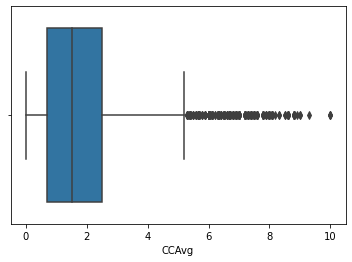

In [27]:
sns.boxplot(data_outliers['CCAvg'])

In [28]:
data_outliers.shape

(5000, 14)

In CCAvg, values above 5 are acting as outliers.

In [29]:
print(np.where(data_outliers['CCAvg']>5))

(array([   9,   18,   44,   55,   61,   90,   96,  131,  145,  150,  151,
        160,  172,  174,  194,  199,  213,  227,  243,  251,  299,  301,
        302,  311,  324,  329,  348,  351,  361,  365,  389,  400,  422,
        423,  432,  462,  463,  474,  475,  479,  494,  509,  526,  544,
        554,  570,  577,  589,  597,  614,  615,  636,  641,  650,  681,
        703,  704,  725,  730,  740,  770,  779,  782,  783,  784,  785,
        787,  800,  805,  807,  834,  881,  891,  909,  915,  917,  935,
        952,  954,  965, 1008, 1023, 1038, 1050, 1064, 1079, 1084, 1116,
       1125, 1148, 1149, 1163, 1190, 1192, 1206, 1220, 1237, 1244, 1273,
       1277, 1304, 1307, 1321, 1328, 1339, 1349, 1354, 1402, 1408, 1411,
       1431, 1432, 1447, 1495, 1498, 1520, 1521, 1541, 1592, 1600, 1603,
       1626, 1629, 1637, 1651, 1652, 1679, 1695, 1696, 1704, 1711, 1716,
       1719, 1752, 1765, 1768, 1792, 1797, 1822, 1824, 1825, 1830, 1843,
       1868, 1884, 1890, 1901, 1918, 1962, 1994, 2

In [30]:
#IQR-Inter Quartile Range
Q1 = np.percentile(data_outliers['CCAvg'], 25, interpolation = 'midpoint')
 
Q3 = np.percentile(data_outliers['CCAvg'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
 
print("Shape Before removing Outliers: ", data_outliers.shape)

Shape Before removing Outliers:  (5000, 14)


In [31]:
#upper bound
upper = np.where(data_outliers['CCAvg'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data_outliers['CCAvg'] <= (Q1-1.5*IQR))

In [32]:
data_outliers.drop(upper[0], inplace = True)
data_outliers.drop(lower[0], inplace = True)
 
print("After Removal of outliers: ", data_outliers.shape)

After Removal of outliers:  (4660, 14)


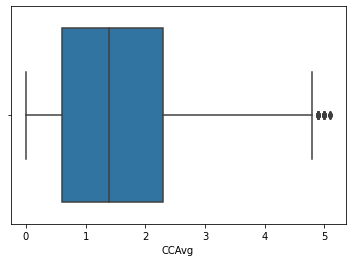

In [33]:
sns.boxplot(data_outliers['CCAvg'])

# Removing outliers from mortgage

In [34]:
data_m_out = data.copy()

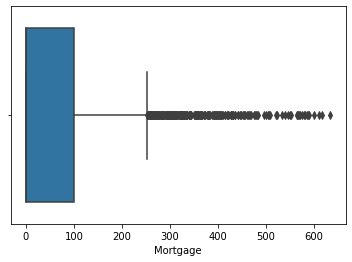

In [35]:
#BoxPlot before removal
sns.boxplot(data_m_out['Mortgage'])

In [36]:
# Position of the Outlier
print(np.where(data_m_out['Mortgage']>250))

(array([  22,   39,   42,   59,   66,  112,  119,  127,  130,  187,  209,
        242,  248,  251,  261,  288,  303,  327,  335,  338,  354,  362,
        365,  405,  459,  473,  479,  486,  526,  528,  540,  570,  584,
        587,  610,  640,  645,  671,  679,  684,  751,  764,  782,  805,
        816,  840,  847,  863,  883,  888,  891,  895,  909,  915,  935,
        948,  952,  973,  998, 1007, 1010, 1014, 1023, 1050, 1077, 1111,
       1162, 1164, 1167, 1232, 1273, 1277, 1280, 1288, 1294, 1301, 1303,
       1304, 1328, 1339, 1354, 1359, 1372, 1395, 1407, 1424, 1466, 1475,
       1513, 1522, 1558, 1582, 1583, 1599, 1623, 1665, 1674, 1688, 1716,
       1732, 1736, 1780, 1783, 1789, 1827, 1835, 1842, 1866, 1871, 1875,
       1882, 1889, 1906, 1937, 1954, 1970, 2002, 2009, 2027, 2034, 2041,
       2074, 2076, 2087, 2090, 2098, 2159, 2190, 2203, 2217, 2232, 2246,
       2291, 2317, 2319, 2323, 2341, 2342, 2345, 2378, 2382, 2394, 2397,
       2422, 2428, 2434, 2443, 2469, 2486, 2498, 2

In [37]:
#IQR-Inter Quartile Range
Q1_M = np.percentile(data_m_out['Mortgage'], 25)
Q3_M = np.percentile(data_m_out['Mortgage'], 75)

IQR_M = Q3_M - Q1_M
 
print("Shape Before removing Outliers: ", data_m_out.shape)

Shape Before removing Outliers:  (5000, 14)


In [38]:
#upper bound
upper_M = np.where(data_m_out['Mortgage'] >= (Q3+1.5*IQR))
# Lower bound
lower_M= np.where(data_m_out['Mortgage'] <= (Q1-1.5*IQR))

In [39]:
#Removing Outliers from Mortgage
data_m_out.drop(upper_M[0], inplace = True)
data_m_out.drop(lower_M[0], inplace = True)
 
print("After Removal of outliers: ", data_m_out.shape)

After Removal of outliers:  (3462, 14)


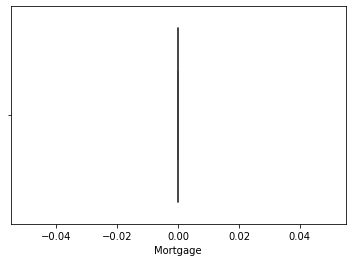

In [40]:
#CCAvg BoxPlot after removing Outliers 
sns.boxplot(data_m_out['Mortgage'])

# Checking model accuracy after removing outliers in CCAvg

In [41]:
X_out = data_outliers[['ID','Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage',
        'Securities Account','CD Account','Online','CreditCard']]

y_out = data_outliers['Personal Loan']

#spliting data 
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

X_train,X_t, y_train,y_t= train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [42]:
regr_out = LogisticRegression()

model_lor_out = regr_out.fit(X_train, y_train)
prediction_out = model_lor_out.predict(X_test)

# Train the model using the training sets
regr_out.fit(X_train,y_train)

#accuracy
print("training data score: {:,.3%}".format(regr_out.score(X_train, y_train)))
print("test data score: {:,.3%}".format(regr_out.score(X_test, y_test)))

y_pred_out = regr_out.predict(X_train)

logloss_out = log_loss(y_test,regr_out.predict_log_proba(X_test))
print("Log loss:",logloss_out)

training data score: 93.191%
test data score: 92.720%
Log loss: 0.6931471805599454


The accuracy of the model remained the same after outliers were taken out of CCAvg.

# Checking model accuracy after removing outliers in Mortgage

In [43]:
X_out = data_m_out[['ID','Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage',
        'Securities Account','CD Account','Online','CreditCard']]

y_out = data_m_out['Personal Loan']

#spliting data 
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

X_train,X_t, y_train,y_t= train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [44]:
regr_m_out = LogisticRegression()

model_lor_m_out = regr_m_out.fit(X_train, y_train)
prediction_m_out = model_lor_m_out.predict(X_test)

# Train the model using the training sets
regr_m_out.fit(X_train,y_train)

#accuracy
print("training data score: {:,.3%}".format(regr_m_out.score(X_train, y_train)))
print("test data score: {:,.3%}".format(regr_m_out.score(X_test, y_test)))

y_pred_m_out = regr_m_out.predict(X_train)

logloss_m_out = log_loss(y_test,regr_m_out.predict_log_proba(X_test))
print("Log loss:",logloss_m_out)

training data score: 93.191%
test data score: 92.720%
Log loss: 0.6931471805599454


# Removing data and applying imputation

In [45]:
data_1 = data.copy()

#removing 1% data from column 
data_percent=data_1['Income'].sample(frac = 0.01)

#using location of fraction data to set null
data_1['Income'].loc[data_1.index.isin(data_percent.index)]=np.NaN

In [46]:
#Count of null values in Income row 
data_1['Income'].isnull().sum()

50

Replacing null values with the median imputtation technique.

In [47]:
data_1['Income']=data_1['Income'].fillna(data_1['Income'].median())

In [48]:
data_1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49.0,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34.0,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11.0,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100.0,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45.0,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40.0,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15.0,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24.0,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49.0,90034,3,0.5,2,0,0,0,0,1,0


In [49]:
#checking recovery after median imputation in column 

data_1.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Null values can be replaced with the Mean Imputation Method.

In [50]:
data_5 = data.copy()

#removing 5% data from column 
data_percent5=data_5['Experience'].sample(frac = 0.05)

#using location of fraction data to set null
data_5['Experience'].loc[data_5.index.isin(data_percent5.index)]=np.NaN

In [51]:
#check number of null values created
data_5.isnull().sum()

ID                      0
Age                     0
Experience            250
Income                  0
ZIP Code                0
Family                  0
CCAvg                   0
Education               0
Mortgage                0
Personal Loan           0
Securities Account      0
CD Account              0
Online                  0
CreditCard              0
dtype: int64

In [52]:
data_5['Experience']=data_5['Experience'].fillna(data_1['Experience'].mean())

In [53]:
data_5

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0000,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0000,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0000,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0000,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,20.1046,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3.0000,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4.0000,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39.0000,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,20.1046,49,90034,3,0.5,2,0,0,0,0,1,0


In [54]:
data_5.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Using Mode imputor to replace 10% of the null values 

In [55]:
#Removing 10% data
data_10 = data.copy()

#removing 5% data from column 
data_percent10=data_10['CCAvg'].sample(frac = 0.1)

#using location of fraction data to set null
data_10['CCAvg'].loc[data_10.index.isin(data_percent10.index)]=np.NaN

In [56]:
data_10.isnull().sum()

ID                      0
Age                     0
Experience              0
Income                  0
ZIP Code                0
Family                  0
CCAvg                 500
Education               0
Mortgage                0
Personal Loan           0
Securities Account      0
CD Account              0
Online                  0
CreditCard              0
dtype: int64

In [57]:
data_10['CCAvg']=data_5['CCAvg'].fillna(data_1['CCAvg'].mode())

In [58]:
data_10.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Using median, mean and mode imputaton methods all the Null values were replaced.


# Conclusion

We can conclude from the analysis done in this notebook that all independent variables are significant and that income has the most impact on whether or not the loan will be approved.

# References

1.Sckit learn offcial documentation

2.Python Data Science Handbook

3.ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

4.Analytics Vidhya

 Used the sample notebook (using the Abalone dataset) to understand the expected format for assignments.

Studied many models and concepts using Analytics Vidhya and the Python Data science Handbook.

Copyright 2022 Riddhi Vora

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.